In [2]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as gp

In [3]:
#filepath = '..\Data\current_who_mortality_2017_2021.csv'
WHO_df = pd.read_csv('C:\\Users\\shyar\\OneDrive\\Bootcamp\\P1Shyla_Branch\\Data\\WHO.csv')
WHO_df.head()

,Year,Country Code,Country Name,Region,Sex,ICD Code,ICD Category,ICD10 Version,Deaths: All Ages,Deaths: 0-1 Years,Deaths: 1-24 Years,Deaths: 25-44 Years,Deaths: 45-69 Years,Deaths: 70-95+ Years,Deaths: Age Not Specified,Age Format,Deaths: Smoketest All Ages
0,2017,4160,Iceland,Northern Europe,1 - Male,A02,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
1,2017,4160,Iceland,Northern Europe,1 - Male,A04,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
2,2017,4160,Iceland,Northern Europe,1 - Male,A08,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
3,2017,4160,Iceland,Northern Europe,1 - Male,A32,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
4,2017,4160,Iceland,Northern Europe,1 - Male,A41,Infectious and parasitic diseases,103,4,0.0,0.0,0.0,2.0,2.0,0.0,0,4.0


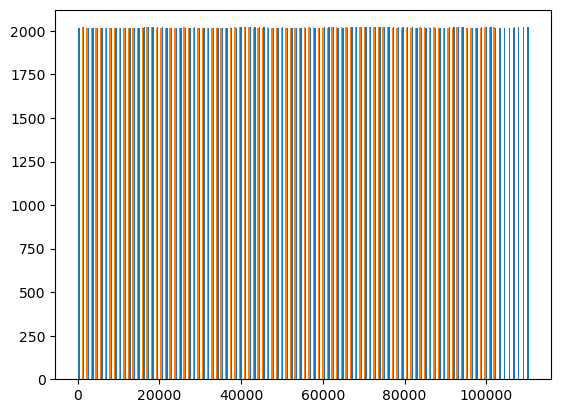

In [24]:

male = WHO_df.loc[(WHO_df["Sex"]=="1 - Male") & (WHO_df["ICD Category"]), "Year"]
female = WHO_df.loc[(WHO_df["Sex"]=="2 - Female") & (WHO_df["ICD Category"]), "Year"]
width = 0.3
plt.bar(np.arange(len(male)), male, width=width)
plt.bar(np.arange(len(female))+ width, female, width=width )
plt.show()


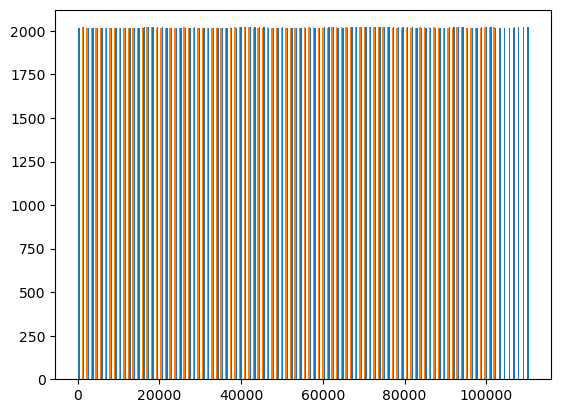

In [25]:
male = WHO_df.loc[(WHO_df["Sex"]=="1 - Male"), "Year"]
female = WHO_df.loc[(WHO_df["Sex"]=="2 - Female"), "Year"]
width = 0.3
plt.bar(np.arange(len(male)), male, width=width)
plt.bar(np.arange(len(female))+ width, female, width=width )
plt.show()

In [4]:
WHO_df["Year"].value_counts()


Year
2021    45358
2020    43931
2017    43128
2019    41775
2018    41381
Name: count, dtype: int64

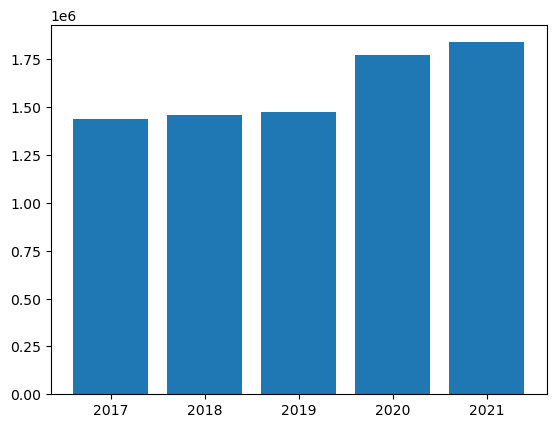

In [30]:
year = WHO_df.loc[(WHO_df["Sex"]=="1 - Male"), "Year"]
male_deaths = WHO_df.loc[(WHO_df["Sex"]=="1 - Male"), "Deaths: All Ages"]
plt.bar(year, male_deaths)

plt.show()

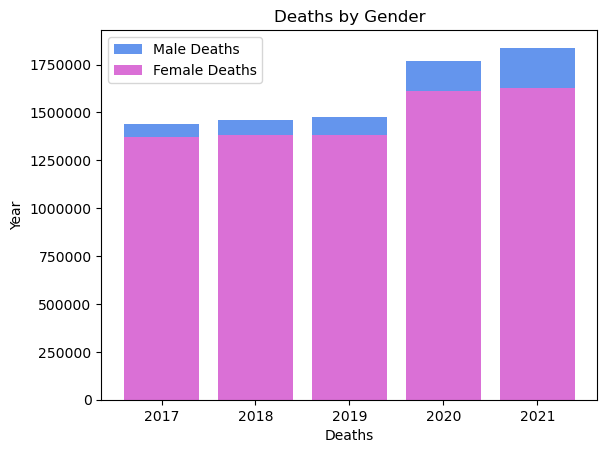

In [159]:

year = WHO_df.loc[(WHO_df["Sex"]=="1 - Male"), "Year"]
year2 = WHO_df.loc[(WHO_df["Sex"]=="2 - Female"), "Year"]

male_deaths = WHO_df.loc[(WHO_df["Sex"]=="1 - Male"), "Deaths: All Ages"]
female_deaths = WHO_df.loc[(WHO_df["Sex"]=="2 - Female"), "Deaths: All Ages"]

plt.bar(year, male_deaths, color='cornflowerblue', label = "Male Deaths")
plt.bar(year2, female_deaths, color='orchid', label ="Female Deaths")
plt.xlabel("Deaths")
plt.ylabel("Year")
plt.legend()
plt.title("Deaths by Gender - All Nations")
plt.ticklabel_format(style="plain")

plt.show()

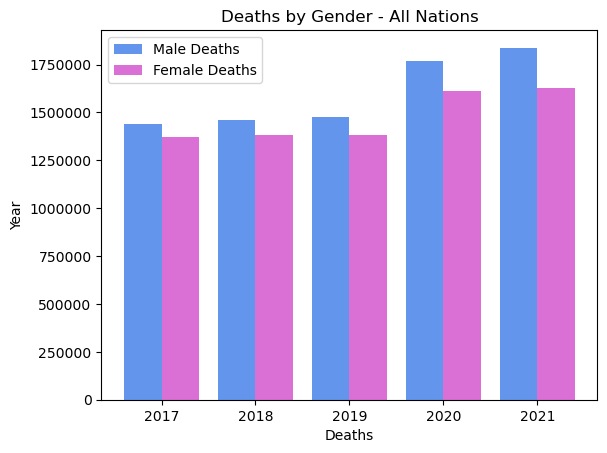

In [27]:
X = [2017, 2018, 2019, 2020, 2021]
year = WHO_df.loc[(WHO_df["Sex"]=="1 - Male"), "Year"]
year2 = WHO_df.loc[(WHO_df["Sex"]=="2 - Female"), "Year"]

X_axis = np.arange(len(X))

male_deaths = WHO_df.loc[(WHO_df["Sex"]=="1 - Male"), "Deaths: All Ages"]
female_deaths = WHO_df.loc[(WHO_df["Sex"]=="2 - Female"), "Deaths: All Ages"]

plt.bar(year -0.2, male_deaths, width=0.4, color="cornflowerblue", label ="Male Deaths")
plt.bar(year2 +0.2, female_deaths, width=0.4, color="orchid",label ="Female Deaths")

#plt.xticks(X_axis, X)
plt.xlabel("Deaths")
plt.ylabel("Year")
plt.title("Deaths by Gender - All Nations")
plt.legend()
plt.ticklabel_format(style="plain")


plt.show()

In [5]:

Boolean_Who = WHO_df[(WHO_df["Sex"]=="1 - Male") | (WHO_df["Sex"]=="2 - Female")]
WHO_group = Boolean_Who.groupby(["Year", "Sex", "Country Name"]).sum()
WHO_group = WHO_group.reset_index()
#WHO_df =pd.DataFrame(WHO_df)
#Unspecified = WHO_group.drop(["Sex"]== "9 - Unspecified")
#WHO_group = WHO_group.drop(Unspecified == True, inplace= True)
display(WHO_group.value_counts("Country Name"))
display(WHO_group.value_counts("Sex"))


Country Name
Australia                   10
Brazil                      10
Canada                      10
Chile                       10
Iceland                     10
Israel                      10
Japan                       10
Poland                      10
Singapore                   10
Sweden                      10
United States of America    10
Tunisia                      6
Name: count, dtype: int64

Sex
1 - Male      58
2 - Female    58
Name: count, dtype: int64

In [7]:
WHO_group.drop(columns=["Deaths: 0-1 Years","Deaths: 1-24 Years","Deaths: 25-44 Years"], inplace= True)
WHO_group.drop(columns=["Deaths: 45-69 Years","Deaths: 70-95+ Years","Deaths: Age Not Specified","Age Format","Deaths: Smoketest All Ages"], inplace=True)
WHO_group.drop(columns=["Country Code", 'Region', "ICD Code", "ICD Category", "ICD10 Version"], inplace=True)

In [8]:

WHO_Country = WHO_group.groupby(["Sex", "Country Name","Deaths: All Ages"]).sum()
WHO_Country.reset_index(inplace=True)

y_death = WHO_Country["Country Name"]
x_M = WHO_Country.loc[WHO_Country["Sex"] == "1 - Male", "Deaths: All Ages"]
x_F = WHO_Country.loc[WHO_Country["Sex"] == "2 - Female", "Deaths: All Ages"] * -1



In [9]:

# Creating instance of the figure 
fig = gp.Figure() 
  
# Adding Male data to the figure 
fig.add_trace(gp.Bar(y= y_death, x = x_M,  
                     name = 'Male', 
                     marker={'color': 'cornflowerblue'},
                     orientation = 'h')) 
  
# Adding Female data to the figure 
fig.add_trace(gp.Bar(y = y_death, x = x_F,
                     marker={'color': 'orchid'}, 
                     name = 'Female', orientation = 'h')) 
  
# Updating the layout for our graph 
fig.update_layout(title = 'Total Deaths by Gender 2017-2021', 
                 title_font_size = 22, barmode = 'relative', 
                 bargap = 0.0, bargroupgap = 0, 
                 xaxis = dict(tickvals = [-15000000,-10000000, -7000000, -6000000, -5000000, -4000000, -3000000, -2000000, -1000000, 
                                          0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 10000000, 15000000], 
                                
                              ticktext = ["15M","10M","7M","6M","5M","4M","3M","2M","1M","0",  
                                          "1M","2M","3M","4M","5M","6M","7M","10M","15M"], 
                                
                              title = 'Death in Millions', 
                              title_font_size = 14) 
                 ) 
  
fig.show()